Mean Absolute Error: 48.1456279696968
Mean Squared Error: 6474.204260210129
R-squared (R2 score): 0.004334291026160897
Accuracy within ±10.0%: 35.0%


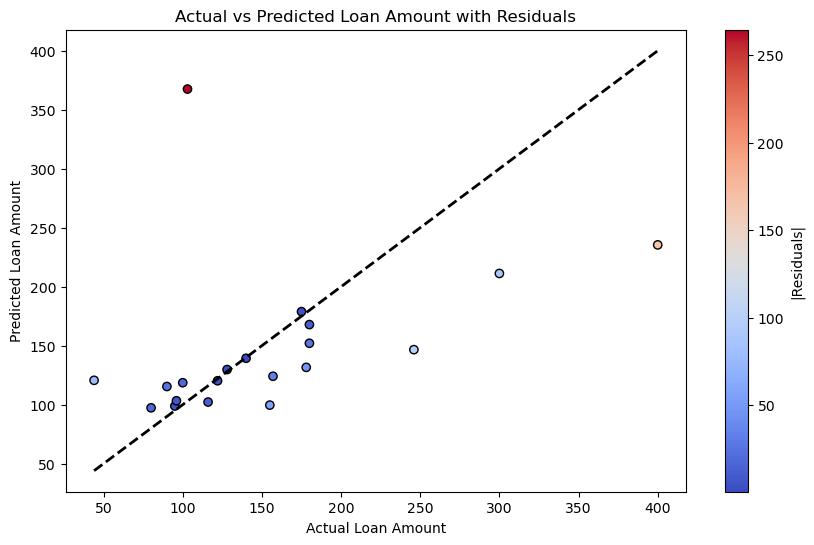

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

file_path = r"C:/Users/Anjali Shetty/Downloads/X_test.csv"
data = pd.read_csv(file_path)

# Adjust column names based on your actual dataset
X_column_names = ['ApplicantIncome', 'CoapplicantIncome']  # Adjust these names accordingly
y_column_name = 'LoanAmount'  # Adjust this name accordingly

# Extract features X and target y from the dataset
X = data[X_column_names].values
y = data[y_column_name].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model (Support Vector Regression)
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2 score)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2 score):", r2)

# Calculate accuracy within a certain threshold (e.g., ±10% of actual values)
threshold = 0.1  # 10% threshold
accurate_predictions = np.abs(y_test - y_pred) <= threshold * y_test
accuracy = np.mean(accurate_predictions)

print(f"Accuracy within ±{threshold * 100}%: {accuracy * 100}%")
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=np.abs(residuals), cmap='coolwarm', edgecolors='k')
plt.colorbar(label='|Residuals|')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted Loan Amount with Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.show()
